In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio
import linearRegCostFunction as lrcf
import trainLinearReg as tlr
import learningCurve as lc
import polyFeatures as pf
import featureNormalize as fn
import plotFit as plotft
import validationCurve as vc

In [2]:
plt.ion()
np.set_printoptions(formatter={'float': '{: 0.6f}'.format})

In [3]:
# ===================== Part 1: Loading and Visualizing Data =====================
# We start the exercise by first loading and visualizing the dataset.
# The following code will load the dataset into your environment and pot
# the data.
#

# Load Training data
print('Loading and Visualizing data ...')

# Load from ex5data1:
data = scio.loadmat('ex5data1.mat')
X = data['X']
y = data['y'].flatten()
Xval = data['Xval']
yval = data['yval'].flatten()
Xtest = data['Xtest']
ytest = data['ytest'].flatten()

m = y.size

Loading and Visualizing data ...


Text(0, 0.5, 'Water folowing out of the dam (y)')

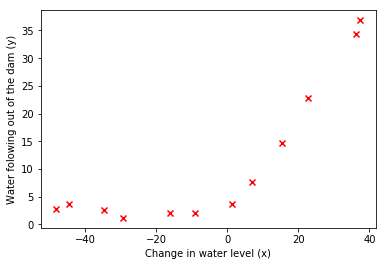

In [4]:
# Plot training data
plt.figure()
plt.scatter(X, y, c='r', marker="x")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water folowing out of the dam (y)')

In [5]:
def linear_reg_cost_function(theta, x, y, lmd):
    # Initialize some useful values
    m = y.size

    # You need to return the following variables correctly
    cost = 0
    grad = np.zeros(theta.shape)

    # ===================== Your Code Here =====================
    # Instructions : Compute the cost and gradient of regularized linear
    #                regression for a particular choice of theta
    #
    #                You should set 'cost' to the cost and 'grad'
    #                to the gradient
    #
    h = (x @ theta)
    cost = 1 * (1/(2*m)) * np.sum(np.square(h - y)) + lmd * (1/(2*m)) * np.sum(np.square(theta[1:])) 
    grad = (1 * (1/m) * (h-y)@x + (lmd * (1/m) * np.r_[0, theta[1:]]))
    # ==========================================================
    return cost, grad

In [6]:
# ===================== Part 2: Regularized Linear Regression Cost =====================
# You should now implement the cost function for regularized linear regression
#

theta = np.ones(2)
# cost, _ = lrcf.linear_reg_cost_function(theta, np.c_[np.ones(m), X], y, 1)
cost, _ = linear_reg_cost_function(theta, np.c_[np.ones(m), X], y, 1)

print('Cost at theta = [1  1]: {:0.6f}\n(this value should be about 303.993192'.format(cost))

Cost at theta = [1  1]: 303.993192
(this value should be about 303.993192


In [7]:
# ===================== Part 3: Regularized Linear Regression Gradient =====================
# You should now implement the gradient for regularized linear regression
#

theta = np.ones(2)
#cost, grad = lrcf.linear_reg_cost_function(theta, np.c_[np.ones(m), X], y, 1)
cost, grad = linear_reg_cost_function(theta, np.c_[np.ones(m), X], y, 1)

print('Gradient at theta = [1  1]: {}\n(this value should be about [-15.303016  598.250744]'.format(grad))

Gradient at theta = [1  1]: [-15.303016  598.250744]
(this value should be about [-15.303016  598.250744]


In [8]:
import scipy.optimize as opt

def train_linear_reg(x, y, lmd):
    initial_theta = np.ones(x.shape[1])

    def cost_func(t):
        return linear_reg_cost_function(t, x, y, lmd)[0]

    def grad_func(t):
        return linear_reg_cost_function(t, x, y, lmd)[1]

    theta, *unused = opt.fmin_cg(cost_func, initial_theta, grad_func, maxiter=200, disp=False,
                                     full_output=True)

    return theta


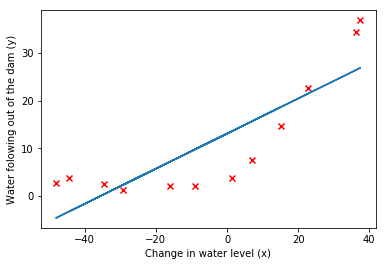

In [9]:
# ===================== Part 4: Train Linear Regression =====================
# Once you have implemented the cost and gradient correctly, the
# train_linear_reg function will use your cost function to train regularzized linear regression.
#
# Write Up Note : The data is non-linear, so this will not give a great fit.
#

# Train linear regression with lambda = 0
lmd = 0

# theta = tlr.train_linear_reg(np.c_[np.ones(m), X], y, lmd)
theta = train_linear_reg(np.c_[np.ones(m), X], y, lmd)

# Plot training data
plt.figure()
plt.scatter(X, y, c='r', marker="x")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water folowing out of the dam (y)')

# Plot fit over the data
plt.plot(X, np.dot(np.c_[np.ones(m), X], theta))

In [10]:
def learning_curve(X, y, Xval, yval, lmd):
    # Number of training examples
    m = X.shape[0]

    # You need to return these values correctly
    error_train = np.zeros(m)
    error_val = np.zeros(m)

    # ===================== Your Code Here =====================
    # Instructions : Fill in this function to return training errors in
    #                error_train and the cross validation errors in error_val.
    #                i.e., error_train[i] and error_val[i] should give you
    #                the errors obtained after training on i examples
    #
    # Note : You should evaluate the training error on the first i training
    #        examples (i.e. X[:i] and y[:i])
    #
    #        For the cross-validation error, you should instead evaluate on
    #        the _entire_ cross validation set (Xval and yval).
    #
    # Note : If you're using your cost function (linear_reg_cost_function)
    #        to compute the training and cross validation error, you should
    #        call the function with the lamdba argument set to 0.
    #        Do note that you will still need to use lamdba when running the
    #        training to obtain the theta parameters.
    #

    
    for i in range(1, m+1):
        theta = train_linear_reg(np.c_[np.ones(i), X[:i]], y[:i], lmd)
        cost, grad = linear_reg_cost_function(theta, np.c_[np.ones(i), X[:i]], y[:i], 0)
        error_train[i-1] = cost
        
        cost, grad = linear_reg_cost_function(theta, np.c_[np.ones(Xval.shape[0]), Xval], yval, 0)
        error_val[i-1] = cost
    # ==========================================================

    return error_train, error_val


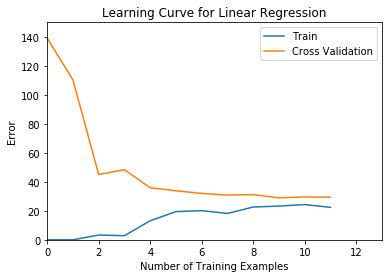

In [11]:

# ===================== Part 5: Learning Curve for Linear Regression =====================
# Next, you should implement the learning_curve function.
#
# Write up note : Since the model is underfitting the data, we expect to
#                 see a graph with "high bias" -- Figure 3 in ex5.pdf
#

lmd = 0
# error_train, error_val = lc.learning_curve(np.c_[np.ones(m), X], y, np.c_[np.ones(Xval.shape[0]), Xval], yval, lmd)
error_train, error_val = learning_curve(np.c_[np.ones(m), X], y, np.c_[np.ones(Xval.shape[0]), Xval], yval, lmd)

plt.figure()
plt.plot(np.arange(m), error_train, np.arange(m), error_val)
plt.title('Learning Curve for Linear Regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])
plt.show()

In [12]:
def poly_features(X, p):
    # You need to return the following variable correctly.
    X_poly = np.zeros((X.size, p))

    # ===================== Your Code Here =====================
    # Instructions : Given a vector X, return a matrix X_poly where the p-th
    #                column of X contains the values of X to the p-th power.
    #
    for i in range(p):
        X_poly[:, i] =  np.power(X, i+1).T
    # ==========================================================


    return X_poly

In [13]:

# ===================== Part 6 : Feature Mapping for Polynomial Regression =====================
# One solution to this is to use polynomial regression. You should now
# complete polyFeatures to map each example into its powers
#

p = 5

# Map X onto Polynomial Features and Normalize
# X_poly = pf.poly_features(X, p)
X_poly = poly_features(X, p)
X_poly, mu, sigma = fn.feature_normalize(X_poly)
X_poly = np.c_[np.ones(m), X_poly]

# Map X_poly_test and normalize (using mu and sigma)
# X_poly_test = pf.poly_features(Xtest, p)
X_poly_test = poly_features(Xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.c_[np.ones(X_poly_test.shape[0]), X_poly_test]

# Map X_poly_val and normalize (using mu and sigma)
# X_poly_val = pf.poly_features(Xval, p)
X_poly_val = poly_features(Xval, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.c_[np.ones(X_poly_val.shape[0]), X_poly_val]

print('Normalized Training Example 1 : \n{}'.format(X_poly[0]))


Normalized Training Example 1 : 
[ 1.000000 -0.362141 -0.755087  0.182226 -0.706190  0.306618]


In [14]:
def train_linear_reg(x, y, lmd):
    initial_theta = np.ones(x.shape[1])

    def cost_func(t):
        return linear_reg_cost_function(t, x, y, lmd)[0]

    def grad_func(t):
        return linear_reg_cost_function(t, x, y, lmd)[1]

    theta, *unused = opt.fmin_cg(cost_func, initial_theta, grad_func, maxiter=200, disp=False,
                                     full_output=True)

    return theta


In [15]:
def plot_fit(min_x, max_x, mu, sigma, theta, p):
    x = np.arange(min_x - 15, max_x + 25, 0.05)

    # X_poly = pf.poly_features(x, p)
    X_poly = poly_features(x, p)
    X_poly -= mu
    X_poly /= sigma

    X_poly = np.c_[np.ones(x.size), X_poly]

    plt.plot(x, np.dot(X_poly, theta))


Text(0.5, 1.0, 'Polynomial Regression Fit (lambda = 0)')

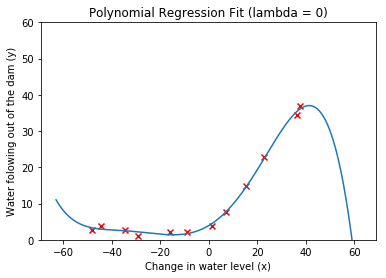

In [16]:
# ===================== Part 7 : Learning Curve for Polynomial Regression =====================
# Now, you will get to experiment with polynomial regression with multiple
# values of lambda. The code below runs polynomial regression with
# lambda = 0. You should try running the code with different values of
# lambda to see how the fit and learning curve change.
#

lmd = 0
# theta = tlr.train_linear_reg(X_poly, y, lmd)
theta = train_linear_reg(X_poly, y, lmd)


# Plot trainint data and fit
plt.figure()
plt.scatter(X, y, c='r', marker="x")
# plotft.plot_fit(np.min(X), np.max(X), mu, sigma, theta, p)
plot_fit(np.min(X), np.max(X), mu, sigma, theta, p)

plt.xlabel('Change in water level (x)')
plt.ylabel('Water folowing out of the dam (y)')
plt.ylim([0, 60])
plt.title('Polynomial Regression Fit (lambda = {})'.format(lmd))

Polynomial Regression (lambda = 0)
# Training Examples	Train Error		Cross Validation Error
  	0		9.860761315262648e-32	99.30405812987325
  	1		1.1857565481603334e-28	99.63378116799029
  	2		4.049667164141863e-12	16.222323357428216
  	3		8.749217473058563e-24	11.848091898948923
  	4		2.6941455299967003e-08	6.084838578884331
  	5		1.9435721380445115e-13	10.136970269806941
  	6		0.0853841788688538	6.009291035844053
  	7		0.08507192887384765	4.970638602521722
  	8		0.2033296002338128	14.505965911574355
  	9		0.2267834412732319	10.712645535954925
  	10		0.20692212806231883	11.031772280779913
  	11		0.20849612433874654	15.629937363906924


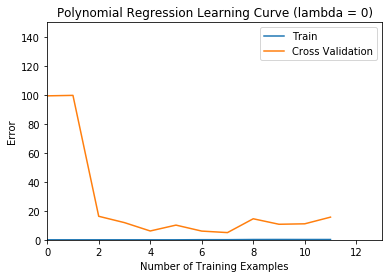

In [17]:
error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, lmd)
plt.figure()
plt.plot(np.arange(m), error_train, np.arange(m), error_val)
plt.title('Polynomial Regression Learning Curve (lambda = {})'.format(lmd))
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

print('Polynomial Regression (lambda = {})'.format(lmd))
print('# Training Examples\tTrain Error\t\tCross Validation Error')
for i in range(m):
    print('  \t{}\t\t{}\t{}'.format(i, error_train[i], error_val[i]))

Text(0.5, 1.0, 'Polynomial Regression Fit (lambda = 1)')

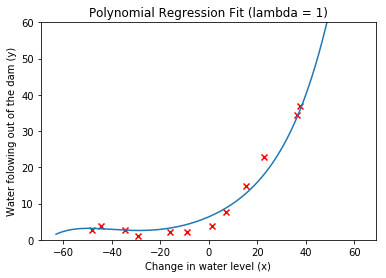

In [18]:
# ===================== Part 7 : Learning Curve for Polynomial Regression =====================
# Now, you will get to experiment with polynomial regression with multiple
# values of lambda. The code below runs polynomial regression with
# lambda = 0. You should try running the code with different values of
# lambda to see how the fit and learning curve change.
#

lmd = 1
# theta = tlr.train_linear_reg(X_poly, y, lmd)
theta = train_linear_reg(X_poly, y, lmd)


# Plot trainint data and fit
plt.figure()
plt.scatter(X, y, c='r', marker="x")
# plotft.plot_fit(np.min(X), np.max(X), mu, sigma, theta, p)
plot_fit(np.min(X), np.max(X), mu, sigma, theta, p)

plt.xlabel('Change in water level (x)')
plt.ylabel('Water folowing out of the dam (y)')
plt.ylim([0, 60])
plt.title('Polynomial Regression Fit (lambda = {})'.format(lmd))

Polynomial Regression (lambda = 1)
# Training Examples	Train Error		Cross Validation Error
  	0		4.56199939795915e-13	138.8467886913956
  	1		0.04681301650735769	143.06082466167464
  	2		3.3087560872065698	7.257166540976983
  	3		1.752858775942759	6.988446575542324
  	4		1.4958401384112818	3.7790571118099834
  	5		1.1096520379744261	4.792211229892257
  	6		1.5594332505738264	3.778981237655777
  	7		1.362793602467611	3.7813685360822515
  	8		1.4801223250593054	4.277983728891496
  	9		1.369615326927559	4.137277721949229
  	10		1.241971459505048	4.187255821397332
  	11		1.9372327105881608	3.7368813998238166


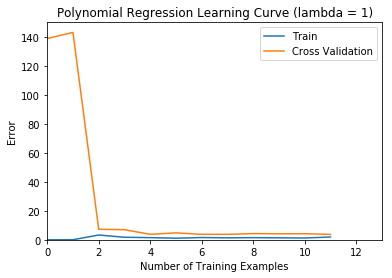

In [19]:
error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, lmd)
plt.figure()
plt.plot(np.arange(m), error_train, np.arange(m), error_val)
plt.title('Polynomial Regression Learning Curve (lambda = {})'.format(lmd))
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

print('Polynomial Regression (lambda = {})'.format(lmd))
print('# Training Examples\tTrain Error\t\tCross Validation Error')
for i in range(m):
    print('  \t{}\t\t{}\t{}'.format(i, error_train[i], error_val[i]))

Text(0.5, 1.0, 'Polynomial Regression Fit (lambda = 100)')

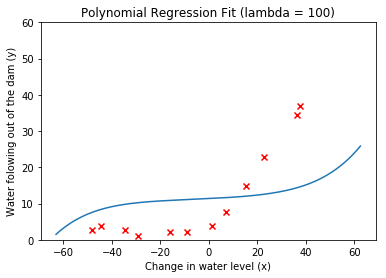

In [20]:
# ===================== Part 7 : Learning Curve for Polynomial Regression =====================
# Now, you will get to experiment with polynomial regression with multiple
# values of lambda. The code below runs polynomial regression with
# lambda = 0. You should try running the code with different values of
# lambda to see how the fit and learning curve change.
#

lmd = 100
# theta = tlr.train_linear_reg(X_poly, y, lmd)
theta = train_linear_reg(X_poly, y, lmd)


# Plot trainint data and fit
plt.figure()
plt.scatter(X, y, c='r', marker="x")
# plotft.plot_fit(np.min(X), np.max(X), mu, sigma, theta, p)
plot_fit(np.min(X), np.max(X), mu, sigma, theta, p)

plt.xlabel('Change in water level (x)')
plt.ylabel('Water folowing out of the dam (y)')
plt.ylim([0, 60])
plt.title('Polynomial Regression Fit (lambda = {})'.format(lmd))

In [21]:
def validation_curve(X, y, Xval, yval):
    # Selected values of lambda (don't change this)
    lambda_vec = np.array([0., 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])

    # You need to return these variables correctly.
    error_train = np.zeros(lambda_vec.size)
    error_val = np.zeros(lambda_vec.size)

    # ===================== Your Code Here =====================
    # Instructions : Fill in this function to return training errors in
    #                error_train and the validation errors in error_val. The
    #                vector lambda_vec contains the different lambda parameters
    #                to use for each calculation of the errors, i.e,
    #                error_train[i], and error_val[i] should give
    #                you the errors obtained after training with
    #                lmd = lambda_vec[i]
    #
    for idx, lmd in enumerate(lambda_vec):
        e_train, e_val = learning_curve(X, y, Xval, yval, lmd)
        error_train[idx] = e_train[-1]
        error_val[idx] = e_val[-1]
    # ==========================================================

    return lambda_vec, error_train, error_val

Text(0, 0.5, 'Error')

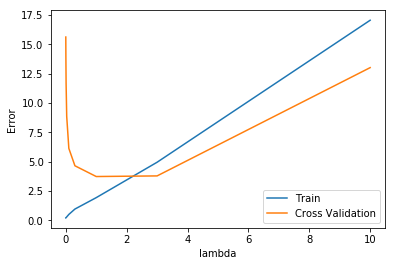

In [22]:
# ===================== Part 8 : Validation for Selecting Lambda =====================
# You will now implement validationCurve to test various values of
# lambda on a validation set. You will then use this to select the
# 'best' lambda value.

# lambda_vec, error_train, error_val = vc.validation_curve(X_poly, y, X_poly_val, yval)
lambda_vec, error_train, error_val = validation_curve(X_poly, y, X_poly_val, yval)

plt.figure()
plt.plot(lambda_vec, error_train, lambda_vec, error_val)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')